In [1]:
%matplotlib notebook
#!/usr/bin/env python

"""test-imu-plot.py: Ask multiwii for raw IMU and plot it using matplotlib."""

import sys
import signal
from pymultiwii import MultiWii
import matplotlib.pyplot as plt

Waking up board on /dev/ttyS4...
1


<IPython.core.display.Javascript object>


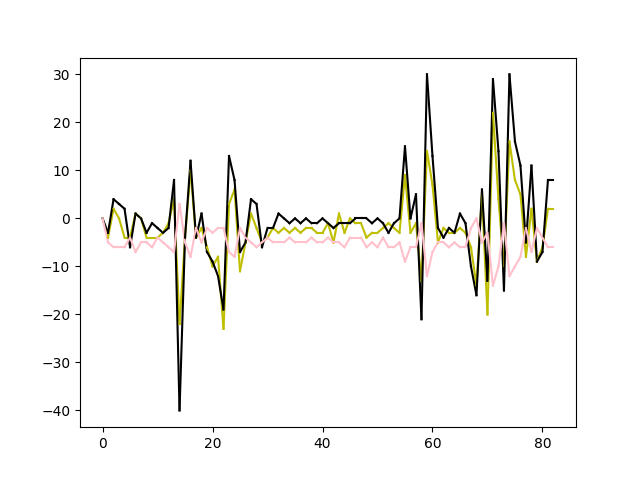

You pressed Ctrl+C!


SystemExit: 

/mnt/d/Stuff/Roland/Uni/2018Sem1Courses/metr4810_team4_2018/orientation_control/env/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
serialPort = "/dev/ttyS4"
board = MultiWii(serialPort)

def handle_close(evt):
    sys.exit()
    
def handle_ctrlC(signal, frame):
    print 'You pressed Ctrl+C!'
    sys.exit()
    
signal.signal(signal.SIGINT, handle_ctrlC)

fig = plt.figure()
plt.ion()
fig.canvas.mpl_connect('close_event', handle_close)

sb = 0
gxbuf, gybuf, gzbuf = 0, 0, 0
senses = 0
    
while True:
    board.getData(MultiWii.RAW_IMU)
	#print board.rawIMU
    t = float(board.rawIMU['timestamp'])
    gx = board.rawIMU['gx']
    gy = board.rawIMU['gy']
    gz = board.rawIMU['gz']
    senses += 1
    plt.plot([sb, senses], [gxbuf, gx], color='y', label='GX')
    plt.plot([sb, senses], [gybuf, gy], color='black', label='GY')
    plt.plot([sb, senses], [gzbuf, gz], color='pink', label='GZ')
    sb, gxbuf, gybuf, gzbuf = senses, gx, gy, gz
    fig.canvas.draw()